<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [65]:
import sys
print(sys.path)

['d:\\VS Code\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38', '', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin', '.', '../../', '.', '../../', '.', '../../']


Importing mandatory methods for the notebook:

In [66]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0           -0.047
           1           -0.221
           2            0.141
           3            0.275
           4           -0.983
           5            0.035
           6           -0.634
           7            0.372
           8            0.828
           9           -0.125
          10           -0.609
          11            0.872
          12           -0.308
          13            0.289
          14            0.327
          15           -0.565
          16            0.014
          17           -0.835
          18           -0.972
          19           -0.903
          20           -0.071
          21            0.141
          22           -0.226
          23           -0.441
          24            0.437
          25            0.446
          26            0.267
          27           -0.058
          28           -0.06
          29            0.501
          30           -

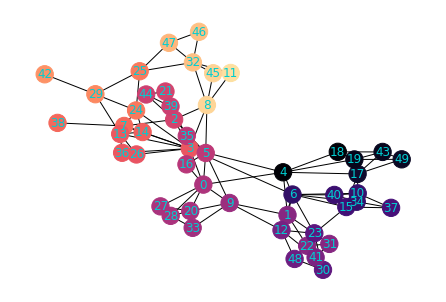

In [67]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0           -0.027
           1           -0.203
           2            0.141
           3            0.275
           4           -0.983
           5            0.035
           6           -0.634
           7            0.372
           8            0.828
           9           -0.125
          10           -0.609
          11            0.865
          12           -0.32
          13            0.242
          14            0.304
          15           -0.555
          16            0.013
          17           -0.826
          18           -0.972
          19           -0.907
          20           -0.071
          21            0.119
          22           -0.226
          23           -0.468
          24            0.437
          25            0.462
          26            0.238
          27           -0.089
          28           -0.04
          29            0.519
          30           -0.427
          31

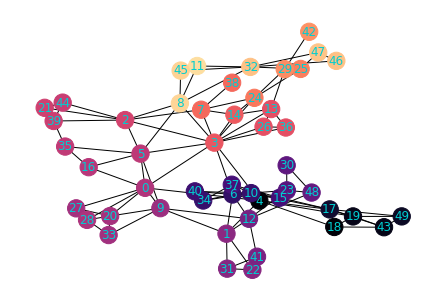

In [68]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.277
           1           -0.668
           2           -0.842
           3           -0.308
           4            0.103
           5           -0.989
           6            0.552
           7           -0.84
           8           -0.424
           9           -0.873
          10           -0.504
          11           -0.921
          12            0.054
          13           -0.12
          14           -0.253
          15            0.511
          16            0.408
          17           -0.505
          18           -0.415
          19           -0.51
          20            0.056
          21           -0.868
          22           -0.11
          23            0.145
          24            0.278
          25           -0.786
          26            0.74
          27           -0.733
          28            0.856
          29           -0.158
          30            0.28

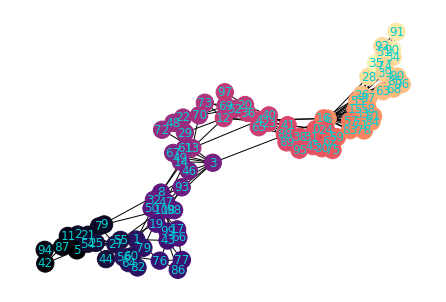

In [69]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [2], avg_friend = 5, hp_alpha=5, hp_beta=0.0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

Epoch	Random	Normal	Nudge	Nudge Var
Starting Nodes:
  node label    opinion value
------------  ---------------
           0            0.277
           1           -0.668
           2           -0.842
           3           -0.308
           4            0.103
           5           -0.989
           6            0.552
           7           -0.84
           8           -0.424
           9           -0.873
          10           -0.504
          11           -0.921
          12            0.054
          13           -0.12
          14           -0.253
          15            0.511
          16            0.408
          17           -0.505
          18           -0.415
          19           -0.51
          20            0.056
          21           -0.868
          22           -0.11
          23            0.145
          24            0.278
          25           -0.786
          26            0.74
          27           -0.733
          28            0.856
          29           

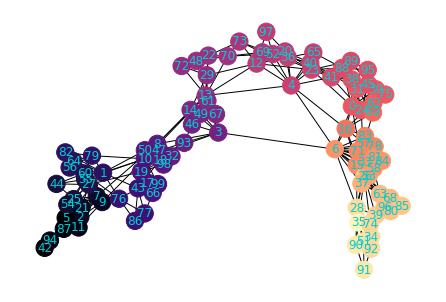

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.338
           1           -0.513
           2           -0.551
           3           -0.187
           4            0.229
           5           -0.552
           6            0.382
           7           -0.539
           8           -0.339
           9           -0.554
          10           -0.426
          11           -0.563
          12            0.063
          13           -0.061
          14           -0.166
          15            0.415
          16            0.359
          17           -0.496
          18           -0.434
          19           -0.492
          20            0.127
          21           -0.539
          22           -0.072
          23            0.271
          24            0.313
          25           -0.538
          26            0.376
          27           -0.533
          28            0.445
          29           -0.085
          30      

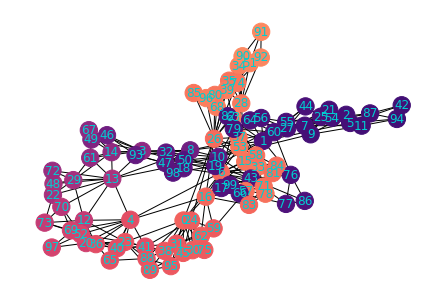

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.159
           1            0.015
           2            0.14
           3            0.205
           4           -0.096
           5            0.049
           6            0.112
           7           -0.055
           8           -0.096
           9            0.134
          10            0.038
          11           -0.098
          12            0.101
          13            0.201
          14           -0.151
          15           -0.123
          16            0.02
          17           -0.035
          18           -0.05
          19           -0.025
          20            0.1
          21           -0.155
          22           -0.237
          23            0.098
          24            0.21
          25            0.193
          26            0.213
          27            0.014
          28            0.227
          29           -0.197
          30        

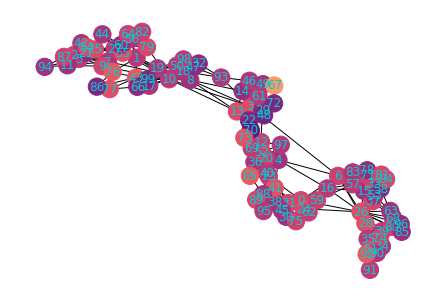

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.015
           1            0.039
           2            0.001
           3           -0.021
           4           -0.006
           5           -0.004
           6            0.002
           7           -0.006
           8           -0.013
           9            0.012
          10           -0.042
          11           -0.019
          12           -0.003
          13            0.022
          14            0.015
          15           -0.017
          16           -0.016
          17           -0.054
          18           -0.023
          19            0.023
          20            0.006
          21           -0.016
          22            0.01
          23           -0.038
          24           -0.038
          25           -0.021
          26           -0.023
          27           -0.015
          28           -0.013
          29            0.015
          30   

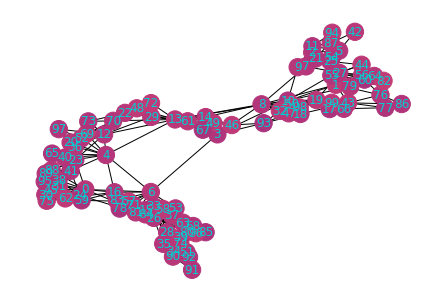

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0                0
           1               -0
           2               -0
           3                0
           4                0
           5               -0
           6                0
           7               -0
           8                0
           9               -0
          10                0
          11               -0
          12                0
          13                0
          14                0
          15                0
          16                0
          17               -0
          18               -0
          19               -0
          20                0
          21               -0
          22                0
          23                0
          24                0
          25               -0
          26                0
          27               -0
          28                0
          29                0
          30   

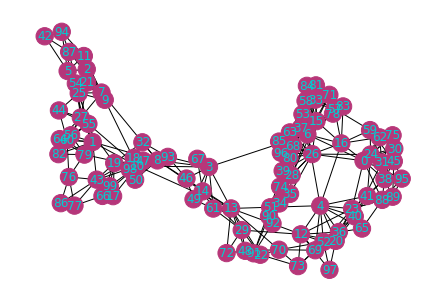

Nudge Opt Recommender Nodes:
  node label    opinion value
------------  ---------------
           0                0
           1               -0
           2               -0
           3                0
           4                0
           5               -0
           6                0
           7               -0
           8               -0
           9               -0
          10               -0
          11               -0
          12                0
          13                0
          14               -0
          15                0
          16                0
          17               -0
          18               -0
          19               -0
          20                0
          21               -0
          22                0
          23                0
          24                0
          25               -0
          26                0
          27               -0
          28                0
          29                0
          3

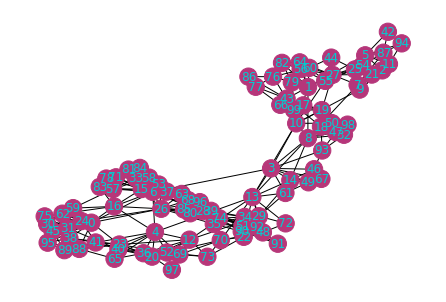

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.363
           1           -0.491
           2           -0.592
           3           -0.316
           4            0.106
           5           -0.567
           6            0.414
           7           -0.533
           8           -0.38
           9           -0.544
          10           -0.432
          11           -0.559
          12           -0.145
          13           -0.246
          14           -0.313
          15            0.425
          16            0.381
          17           -0.465
          18           -0.427
          19           -0.496
          20            0.078
          21           -0.591
          22           -0.16
          23            0.283
          24            0.361
          25           -0.589
          26            0.42
          27           -0.545
          28            0.453
          29           -0.212
          30    

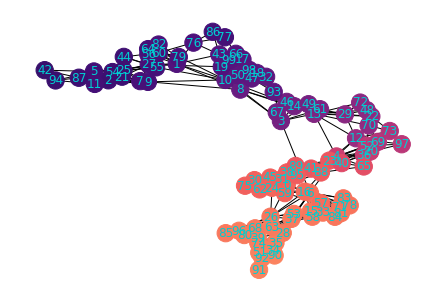

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.192
           1           -0.36
           2           -0.434
           3           -0.186
           4            0.134
           5           -0.476
           6            0.283
           7           -0.302
           8           -0.187
           9           -0.381
          10           -0.229
          11           -0.467
          12            0.029
          13           -0.098
          14           -0.173
          15            0.36
          16            0.178
          17           -0.315
          18           -0.259
          19           -0.291
          20            0.044
          21           -0.453
          22           -0.081
          23            0.022
          24            0.341
          25           -0.466
          26            0.301
          27           -0.455
          28            0.45
          29           -0.13
          30   

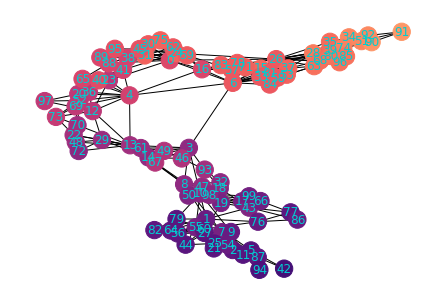

Polarisation (starting): 32.40514375676013
Bimodality (starting): -0.8181011645154315
Disagreement (starting - mean): 0.7719839287469761
Disagreement (starting - std): 0.7643191696161248
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Polarisation (no recommender): 16.364242713336534
Bimodality (no recommender): -0.6076565118029618
Disagreement (no recommender - mean): 0.36365944779737985
Disagreement (no recommender - std): 0.38313100682411594
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Polarisation (random recommender): 2.567007204713584
Bimodality (random recommender): 2.826122870644931
Disagreement (random recommender - mean): 1.1280100755281095
Disagreement (random recommender - std): 0.5784452541704649
Entropy (random recommender - mean): 0.856930197471842
Entropy (random recommender - s

In [70]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = G.copy()
random_G = G.copy()
normal_G = G.copy()
nudge_G = G.copy()
nudge_var_G = G.copy()
similar_G = G.copy()
unsimilar_G = G.copy()
random_param = {'n_post': 4}
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 4}
nudge_param = {'nudge_goal': 0.0, 'n_post': 4}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50,
                                                strat_param=random_param)
  normal_G = simulate_epoch_content_recommender(normal_G, 50, 50, 
                                               strategy="normal", 
                                               strat_param=normal_param)
  nudge_G = simulate_epoch_content_recommender(nudge_G, 50, 50,
                                               strategy="nudge",
                                               strat_param=nudge_param)

  nudge_opt_G = simulate_epoch_content_recommender(nudge_var_G, 50, 50,
                                               strategy="nudge_opt",
                                               strat_param=nudge_param)
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 50, 50, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param)
  #print(f'{i} \t {np.round(np.mean(list(feed_satisfaction(random_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(normal_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_var_G).values())), 3)}\t')
  

# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge (optimized) content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_opt_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_opt_G, 'opinion')
print("Nudge Opt Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Opt Recommender Graph:")
nx.draw(nudge_opt_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, nudge_opt_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "nudge opt recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
  print(f"Polarisation ({text}): {polarisation(g)}")
  print(f"Bimodality ({text}): {sarle_bimodality(g)}")
  #print(f"Disagreement ({text}): {disagreement(g)}")
  print(f"Disagreement ({text} - mean): {np.mean(list(disagreement(g).values()))}")
  print(f"Disagreement ({text} - std): {np.std(list(disagreement(g).values()))}")
  #print(f"Entropy ({text}): {feed_entropy(g)}")
  print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
  print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
  #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
  print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
  print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")

